### **Part 1:** Download the Dataset

In [170]:
# Imports

# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Graphics and pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00', 'tomato']

# Machine learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load file with data
data = pd.read_csv('data/glass.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [171]:
# Get the data ready for use
clean_data = data.copy()

# Rename the outcome column to glass type
#  Note: Two columns are the same INTENTIONALLY
clean_data['Type'] = clean_data['Type'].replace(
    {1: 'Building',
     2: 'Building',
     3: 'Vehicle',
     4: 'Vehicle',
     5: 'Container',
     6: 'Tableware',
     7: 'Headlamp'
    })

# Separate out classfiers from features
X = clean_data.copy().drop(columns=['Type'])
y = clean_data.copy()['Type']

# Normalize data
ss = StandardScaler()
ss.fit(X)
X[:] = ss.transform(X)

# Split data for train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# Create a models dictionary
models = dict()

### **Part 2:** Explore the Data

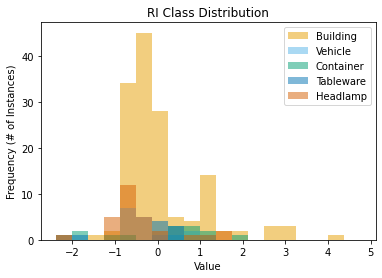

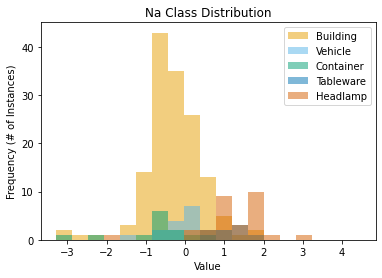

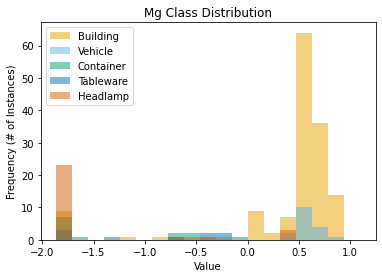

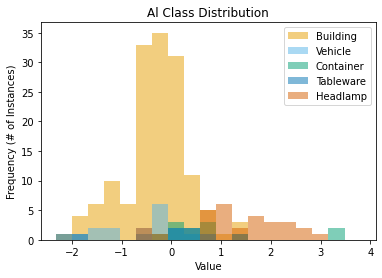

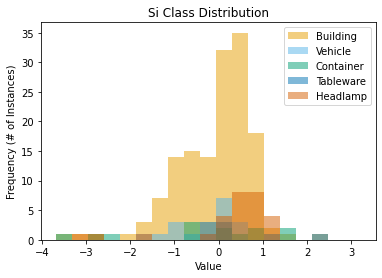

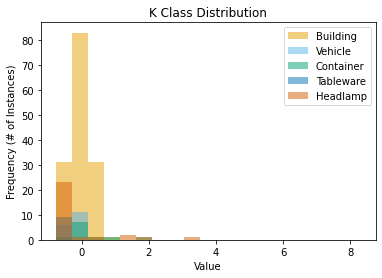

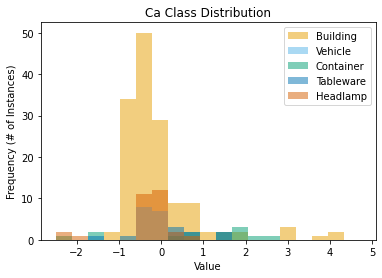

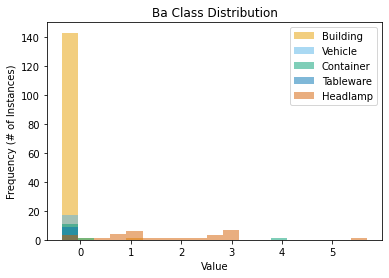

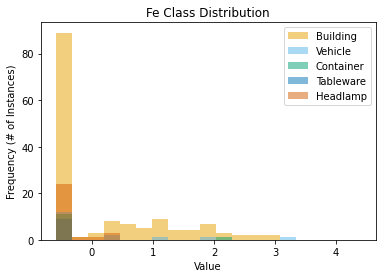

In [172]:
# Create histograms for each data type

# Iterate through all columns
for column in X.columns:
  
  # Get this column of data with labels
  this_data = pd.concat([clean_data['Type'], X[column]], axis=1)

  # Get range
  min_val = float(this_data[column].min())
  max_val = float(this_data[column].max())
  bin_size = float((max_val - min_val) / 20)

  # Form histogram
  i = 0
  fig, ax = plt.subplots()
  for group in this_data['Type'].unique():
    ax.hist(this_data[column][this_data['Type'] == group], color=colors[i],
            alpha=0.5, label=group, bins=list(np.arange(min_val, max_val, bin_size)))
    i += 1
  ax.set_xlabel('Value')
  ax.set_ylabel('Frequency (# of Instances)')
  ax.set_title(f'{column} Class Distribution')
  ax.legend()
  plt.show()

Text(0.5, 1.0, 'Classification Counts')

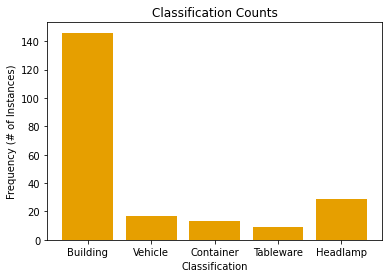

In [173]:
# Get frequency counts of groups
fig, ax = plt.subplots()
labels = y.unique()
cts = []
for label in labels:
  cts.append(y[y == label].count())
ax.bar(labels, cts, color=colors[0])
ax.set_xlabel('Classification')
ax.set_ylabel('Frequency (# of Instances)')
ax.set_title(f'Classification Counts')

### **Part 3:** Get Comparison to k-NN

In [174]:
# Add baseline k-NN model

# Form the model
knn_base = KNeighborsClassifier()

# Train each model
knn_base.fit(X_train, y_train)

# Add model to dictionary
models['k-NN (Base)'] = knn_base


In [175]:
# Add tuned k-NN model

# List Hyperparameters that we want to tune.
leaf_size = list(range(1, 51, 1))
n_neighbors = list(range(2, 11))
p=[1, 2]

# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create new KNN object
knn_opt = KNeighborsClassifier(algorithm='ball_tree')

# Use grid search to find the ideal hyperparamters
grid_search_knn = GridSearchCV(knn_opt, hyperparameters, cv=10)

# Fit the model
grid_search_knn.fit(X_train, y_train)

# Add model to dictionary
models['k-NN (Grid Search Tuned)'] = grid_search_knn

### **Part 4:** Form Baseline Random Forest Model

In [176]:
# Add baseline random forest model

# Form the model
rf_base = RandomForestClassifier(random_state=0)

# Train each model
rf_base.fit(X_train, y_train)

# Add model to dictionary
models['Random Forest (Base)'] = rf_base

### **Part 5:** Execute Grid Search for Tuned Parameters

In [177]:
# Add tuned random forest model using grid search

# List Hyperparameters that we want to tune.
n_estimators = range(10, 251, 10)
max_features = ['sqrt'] # Not explored
max_depth = list(range(1, 21))
min_samples_leaf = [2] # Not explored
min_samples_split = [2] # Not explored

# Convert to dictionary
hyperparameters = dict()
hyperparameters['n_estimators'] = n_estimators
hyperparameters['max_features'] = max_features
hyperparameters['max_depth'] = max_depth
hyperparameters['min_samples_leaf'] = min_samples_leaf
hyperparameters['min_samples_split'] = min_samples_split
hyperparameters['criterion'] = ["gini"]

# Create new KNN object
rf_opt = RandomForestClassifier(random_state=0)

# Use grid search to find the ideal hyperparamters
grid_search_rf = GridSearchCV(rf_opt, hyperparameters, cv=2, verbose=5)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Add model to dictionary
models['Random Forest (Grid Search Tuned)'] = grid_search_rf

Fitting 2 folds for each of 500 candidates, totalling 1000 fits
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.802 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10;, score=0.800 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.814 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=20;, score=0.800 total time=   0.0s
[CV 1/2] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.814 total time=   0.0s
[CV 2/2] END criterion=gini, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=30;, score=0.812 total time=   0.0s
[CV 1/2] END criterion=gini, m

In [178]:
# Get best parameters
print(models['Random Forest (Grid Search Tuned)'].best_params_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 90}


### **Part 6:** Execute a Individualized Analysis of Hyperparameters

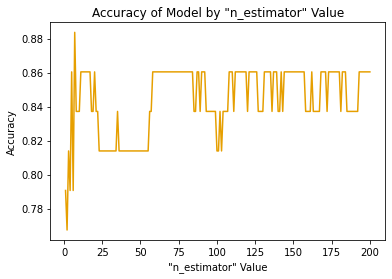

Best n_estimator: 7


In [179]:
# Make graphic for n_estimators

# Get accuracy values
accuracy = []
values = list(range(1, 201, 1))
max_val = 0
max_int = 0
for n_estimator in range(1, 201, 1):
  test_model = RandomForestClassifier(random_state=0, n_estimators=n_estimator)
  test_model.fit(X_train, y_train)
  accuracy.append(accuracy_score(y_test, test_model.predict(X_test)))
  if (max_val < accuracy_score(y_test, test_model.predict(X_test))):
    max_val = accuracy_score(y_test, test_model.predict(X_test))
    max_int = n_estimator


# Plot accuracy
fig, ax = plt.subplots()
ax.plot(values, accuracy, color=colors[0])
ax.set_xlabel('"n_estimator" Value')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Model by "n_estimator" Value')
plt.show()
print(f'Best n_estimator: {max_int}')

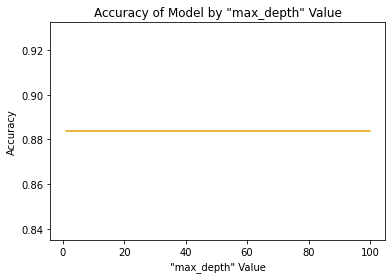

Best max_depth: 1


In [180]:
# Make graphic for max_depth

# Get accuracy values
accuracy = []
values = list(range(1, 101, 1))
max_val = 0
max_int = 0
for max_depth in range(1, 101, 1):
  test_model = RandomForestClassifier(random_state=0, max_depth=n_estimator,
                                      n_estimators=7)
  test_model.fit(X_train, y_train)
  accuracy.append(accuracy_score(y_test, test_model.predict(X_test)))
  if (max_val < accuracy_score(y_test, test_model.predict(X_test))):
    max_val = accuracy_score(y_test, test_model.predict(X_test))
    max_int = max_depth

# Plot accuracy
fig, ax = plt.subplots()
ax.plot(values, accuracy, color=colors[0])
ax.set_xlabel('"max_depth" Value')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Model by "max_depth" Value')
plt.show()
print(f'Best max_depth: {max_int}')

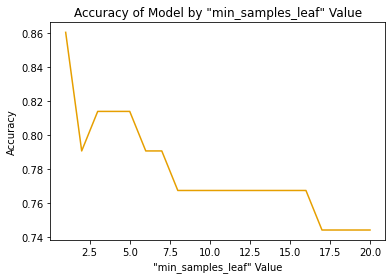

Best min_samples_leaf: 1


In [181]:
# Make graphic for min_samples_leaf

# Get accuracy values
accuracy = []
values = list(range(1,21))
max_val = 0
max_int = 0
for min_samples_leaf in range(1,21):
  test_model = RandomForestClassifier(random_state=0, max_depth=8,
                                      n_estimators=7,
                                      min_samples_leaf=min_samples_leaf)
  test_model.fit(X_train, y_train)
  accuracy.append(accuracy_score(y_test, test_model.predict(X_test)))
  if (max_val < accuracy_score(y_test, test_model.predict(X_test))):
    max_val = accuracy_score(y_test, test_model.predict(X_test))
    max_int = min_samples_leaf

# Plot accuracy
fig, ax = plt.subplots()
ax.plot(values, accuracy, color=colors[0])
ax.set_xlabel('"min_samples_leaf" Value')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Model by "min_samples_leaf" Value')
plt.show()
print(f'Best min_samples_leaf: {max_int}')

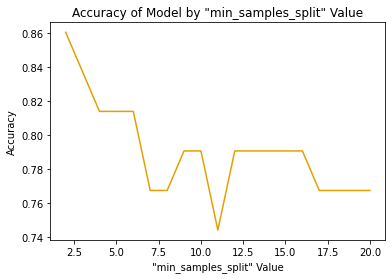

Best min_samples_split: 2


In [182]:
# Make graphic for min_samples_split

# Get accuracy values
accuracy = []
values = list(range(2,21))
max_val = 0
max_int = 0
for min_samples_split in range(2,21):
  test_model = RandomForestClassifier(random_state=0, max_depth=8,
                                      n_estimators=7,
                                      min_samples_leaf=1,
                                      min_samples_split=min_samples_split)
  test_model.fit(X_train, y_train)
  accuracy.append(accuracy_score(y_test, test_model.predict(X_test)))
  if (max_val < accuracy_score(y_test, test_model.predict(X_test))):
    max_val = accuracy_score(y_test, test_model.predict(X_test))
    max_int = min_samples_split

# Plot accuracy
fig, ax = plt.subplots()
ax.plot(values, accuracy, color=colors[0])
ax.set_xlabel('"min_samples_split" Value')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Model by "min_samples_split" Value')
plt.show()
print(f'Best min_samples_split: {max_int}')

In [187]:
rf_model_manual = RandomForestClassifier(random_state=0, max_depth=8,
                                      n_estimators=7,
                                      min_samples_leaf=1,
                                      min_samples_split=2)
rf_model_manual.fit(X_train, y_train)
models['Random Forest (Manually Tuned)'] = rf_model_manual

### **Part 7:** Explore Limiting Input Variables

In [188]:
# Remove all variables that don't have strong value differences
X_train_lim = X_train.copy().drop(columns=['RI', 'Na', 'Si', 'Ca'])
X_test_lim = X_test.copy().drop(columns=['RI', 'Na', 'Si', 'Ca'])

# Get model
lim_model = RandomForestClassifier(random_state=0, max_depth=8,
                                      n_estimators=7,
                                      min_samples_leaf=1,
                                      min_samples_split=min_samples_split)
lim_model.fit(X_train_lim, y_train)
models['Random Forest (Limited Input)'] = lim_model

### **Part 8:** Evaluate Each Model 

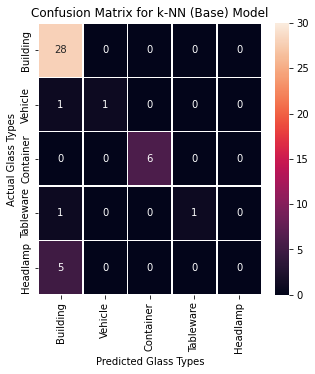

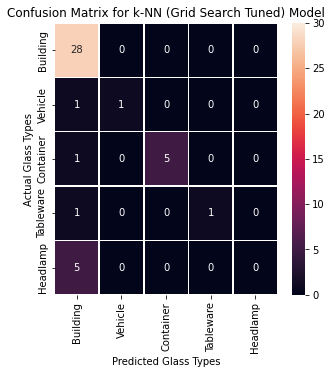

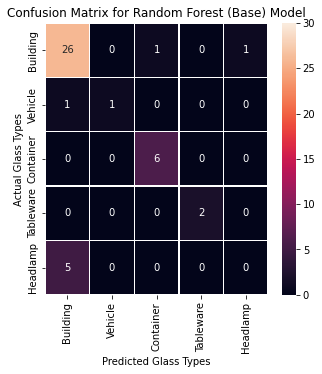

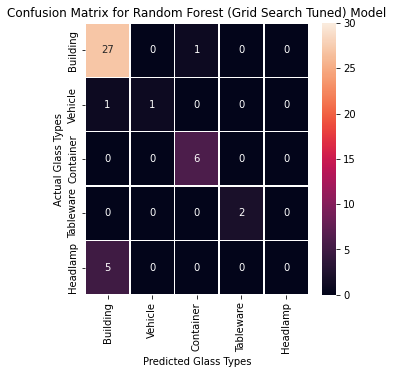

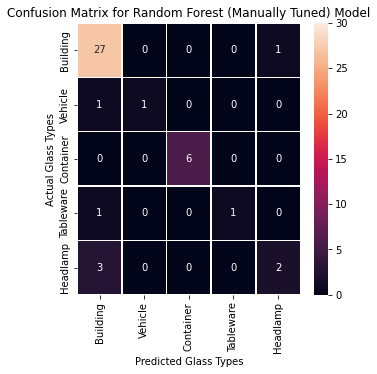

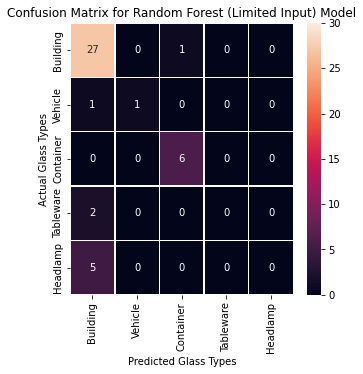

In [189]:
# Get confusion matrices for each model
for model_name in models.keys():
  
  # Get this model
  model = models[model_name]

  # Predict for this model
  if (model_name != 'Random Forest (Limited Input)'):
    prediction = model.predict(X_test)
  else:
    prediction = model.predict(X_test_lim)

  # Create a confusion matrix
  cm = confusion_matrix(y_test, prediction)
  f, ax = plt.subplots(figsize =(5,5))
  sns.heatmap(cm, annot = True, linewidths=0.5, fmt = ".0f", ax=ax, vmin=0,
              vmax=30, xticklabels=y.unique(), yticklabels=y.unique())
  ax.set_xlabel("Predicted Glass Types")
  ax.set_ylabel("Actual Glass Types")
  ax.set_title(f'Confusion Matrix for {model_name} Model')
  plt.show()

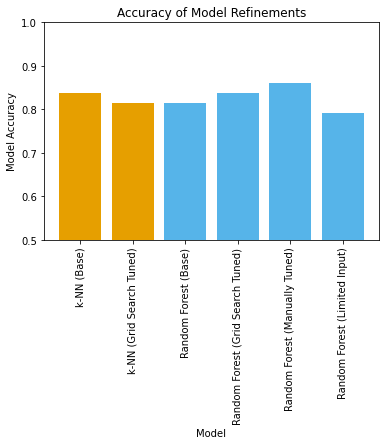

In [191]:
# Get the accuracy of each model
model_names = []
accuracies = []
for key in models.keys():
  model = models[key]
  acc = 0
  if (key != 'Random Forest (Limited Input)'):
    acc = accuracy_score(y_test, model.predict(X_test))
  else:
    acc = accuracy_score(y_test, model.predict(X_test_lim))
  model_names.append(key)
  accuracies.append(acc)

# Plot the accuracies
fig, ax = plt.subplots()
ax.bar(model_names, accuracies, color=['#E69F00', '#E69F00', '#56B4E9',
                                       '#56B4E9', '#56B4E9', '#56B4E9'])
ax.set_xlabel('Model')
ax.set_ylabel('Model Accuracy')
ax.set_xticklabels(model_names, rotation = 90)
ax.set_title('Accuracy of Model Refinements')
ax.set_ylim([0.5, 1.0])
plt.show()